In [1]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt
import openai
import requests
from io import BytesIO
import torchvision
import numpy as np
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from Classifier import Classifier

In [2]:
classifier=Classifier(['cat','dog'])

In [3]:
classifier.descriptors={'cat':['long, sensitive whiskers','have large, round eyes','have large, upright ears','have soft, thick fur'],'dog':['have two large, round eyes','have a wet nose','are covered in fur','have claws on their paws']}

In [4]:
dog=Image.open("dog.png")
cat=Image.open("cat.jpg")

In [9]:
classifier.compute_threshold()

0.125


In [10]:
classifier.set_image(dog)

This image may show: 
1) dog: 99.51543807983398%
2) cat: 0.4845644347369671%


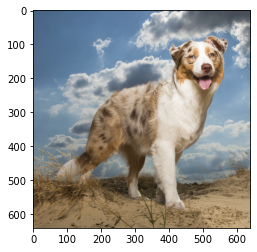

In [11]:
classifier.classify()

In [12]:
classifier.similarity_desc

{'cat': array([18.023935, 18.708595, 19.918154, 20.877169], dtype=float32),
 'dog': array([25.77623 , 24.359991, 24.504585, 24.186306], dtype=float32)}

dog is characterized by the following features: 
✅ have two large, round eyes: 57.90601968765259%
✅ have a wet nose: 14.049440622329712%
✅ are covered in fur: 16.235120594501495%
❌ have claws on their paws: 11.809420585632324%


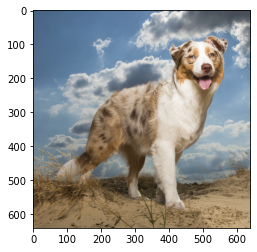

In [15]:
classifier.explain('dog')

In [16]:
# Load the GPT-2 model and tokenizer
model_name = 'gpt2-large'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

In [17]:
# Define the function that generates features for a category

def generate_features(category):
    # Generate the input text for the GPT-2 model
    input_text = f"Q: What are useful features for distinguishing a {category} in a photo without any explanation?\nA: There are several useful visual features to tell there is a {category} in a photo:\n-"
    input_ids = tokenizer.encode(input_text, return_tensors='pt')

    # Generate text from the GPT-2 model
    output = model.generate(input_ids, max_length=100,pad_token_id=tokenizer.eos_token_id, do_sample=True, temperature=0.7)
    output_text = tokenizer.decode(output[0], skip_special_tokens=True)



    return output_text


In [18]:
# Example usage
category = 'store'
features = generate_features(category)
print(features)

Q: What are useful features for distinguishing a store in a photo without any explanation?
A: There are several useful visual features to tell there is a store in a photo:
- The store name is visible and readable.
- The store is visible from the top of the photo.
- It is not hidden behind a fence.
- The store is visible from the front of the photo.
- It is very obvious that the store is a store.
-
